In [1]:
import csv
from datetime import datetime
import pandas as pd

In [2]:
# Read the CSV file

data=pd.read_csv("./eye_logs/eye_log11.csv" )

In [7]:
blink_count = 0
eye_before = 1
duration=0
blink_count=0
time_at_before = None
index=0

In [85]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')


In [109]:
from datetime import datetime 
blink_duration=[]
blink_count = 0
eye_state_before = 1
duration=0
check=0
blink_count=0
start_time = datetime.strptime("2023-10-11 14:27:33", "%Y-%m-%d %H:%M:%S")
end_time=0
index=1
y=datetime.strptime("2023-10-11 14:27:34", "%Y-%m-%d %H:%M:%S")
for eye_state in data['Eye State']:
    check=0
    if eye_state == 1 and eye_state_before==0:
        date= str(data.loc[index,('Timestamp')])
        start_time=datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    elif eye_state == 1 and eye_state_before==1:
        blink_duration.append(0.5)
        check=1
    elif eye_state_before==1 and eye_state==0:
        date=str(data.loc[index,('Timestamp')])
        end_time=datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
        duration = end_time - start_time
        seconds = duration.total_seconds()
        blink_count+=1
        if seconds < 1:
            seconds = 0.3  
        print(blink_count,seconds)
        data['blink_duration']=data.loc[index,]
        blink_duration.append(seconds)
        check=1
    if check==0:
        blink_duration.append(0)
    eye_state_before=eye_state
    index+=1
print("Total no of blinks ",blink_count)




1 1.0
2 9.0
3 1.0
4 2.0
5 1.0
6 1.0
7 0.3
8 0.3
9 0.3
10 1.0
11 1.0
12 1.0
13 0.3
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 0.3
20 0.3
21 0.3
22 2.0
23 1.0
24 0.3
25 4.0
26 2.0
27 0.3
28 2.0
29 1.0
30 1.0
31 2.0
32 2.0
33 1.0
34 2.0
35 1.0
36 1.0
37 3.0
38 1.0
Total no of blinks  38


In [110]:
print(blink_duration)
data['blink_duration']=blink_duration

[1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 9.0, 0, 0.5, 1.0, 0, 0.5, 0.5, 0.5, 2.0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0, 0.3, 0, 0.3, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0.3, 0, 0.5, 1.0, 0, 0, 1.0, 0, 1.0, 0, 0.5, 1.0, 0, 1.0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.3, 0, 0, 0, 0.3, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 2.0, 0, 0.5, 0.5, 1.0, 0, 0, 0, 0, 0, 0, 0.3, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 2.0, 0, 0, 0, 0, 0, 0, 0.3, 0, 0.5, 0.5, 2.0, 0, 0.5, 0.5, 1.0, 0, 0.5, 1.0, 0, 0.5, 0.5, 0.5, 2.0, 0, 0.5, 0.5, 0.5, 0.5, 2.0, 0, 0.5, 0.5, 1.0, 0, 0.5, 0.5, 0.5, 2.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0.5, 1.0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 3.0, 0, 0.5, 1.0, 0, 0.5, 0.5]


In [107]:
csv_file_path = "./output.csv"  # Replace with your desired file path

# Save the DataFrame to a CSV file
data.to_csv(csv_file_path, index=False)  

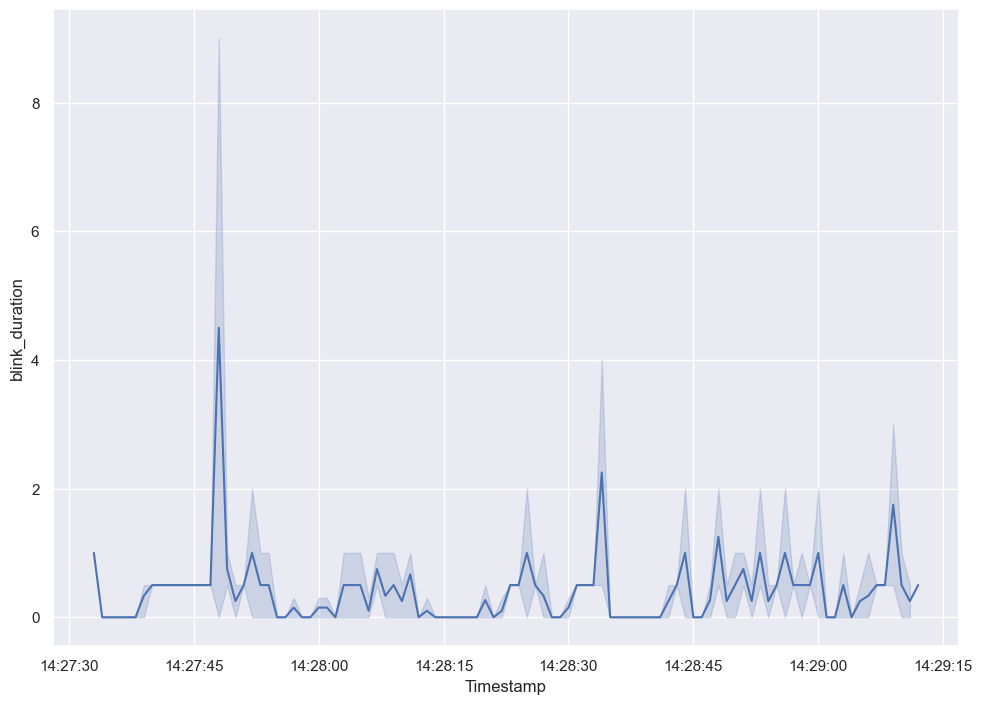

In [113]:
import seaborn as sns
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.Score = pd.to_numeric(data.Score)

data['mov_avg'] = data['Score'].rolling(7).sum()

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(
    x='Timestamp',
    y='blink_duration',
    data=data)



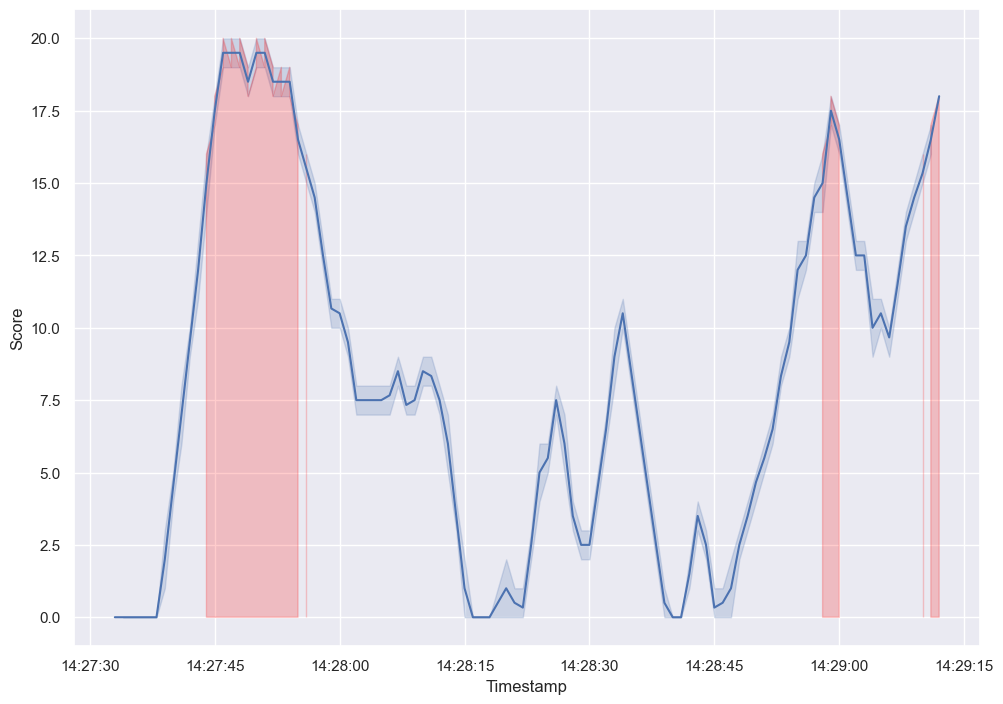

In [112]:
import seaborn as sns
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.Score = pd.to_numeric(data.Score)

data['mov_avg'] = data['Score'].rolling(7).sum()

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(
    x='Timestamp',
    y='Score',
    data=data)

# Highlight the area under the curve where Score > 15
ax.fill_between(data['Timestamp'], 0, data['Score'], where=(data['Score'] > 15), color='red', alpha=0.2)